<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

Welcome to Boston Massachusetts in the 1970s Project! In this project, I am trying to build a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To accomplish this project I will:

1. Analyse and explore the Boston house price data
2. Split the data for training and testing
3. Run a Multivariable Regression
4. Evaluate model's coefficients and residuals
5. Use data transformation to improve model performance
6. Use the model to estimate a property price

###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [ ]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


# Preliminary Data Exploration 🔎

**Basic understanding of the dataset working with**

* What is the shape of `data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f"There are {data.shape[0]} rows, {data.shape[1]} column in data")

There are 506 rows, 14 column in data


In [ ]:
#dataset information
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


None

In [ ]:
#5 top rows in dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [ ]:
#5 bottom rows in dataset
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00
505,0.05,0.00,11.93,0.00,0.57,6.03,80.80,2.50,1.00,273.00,21.00,396.90,7.88,11.90


## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
print(f"Check for duplicates: {data.duplicated().values.any()}")
print(f"Check for missing values:{data.isna().values.any()} ")

Check for duplicates: False
Check for missing values:False 


## Descriptive Statistics

**Explore few more details of dataset**


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


With data.describe() function, we can understand some basic information of dataset such as:

*   **Around 18 students per teacher on average**
*   **Average price of a Boston home in 1970s was $22,530.**
*   **CHAS shows whether the home is next to the Charles River or not. As such, it only has the value 0 or 1. This kind of feature is also known as a dummy variable**
*   **3.56 rooms is minimum number of rooms per dwelling and 8.78 rooms is maximum number of rooms per dwelling**





## Visualise the Features

**In order to visualise the data for your model, I use [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables:**
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways.


#### House Prices 💰

<Figure size 1600x800 with 0 Axes>

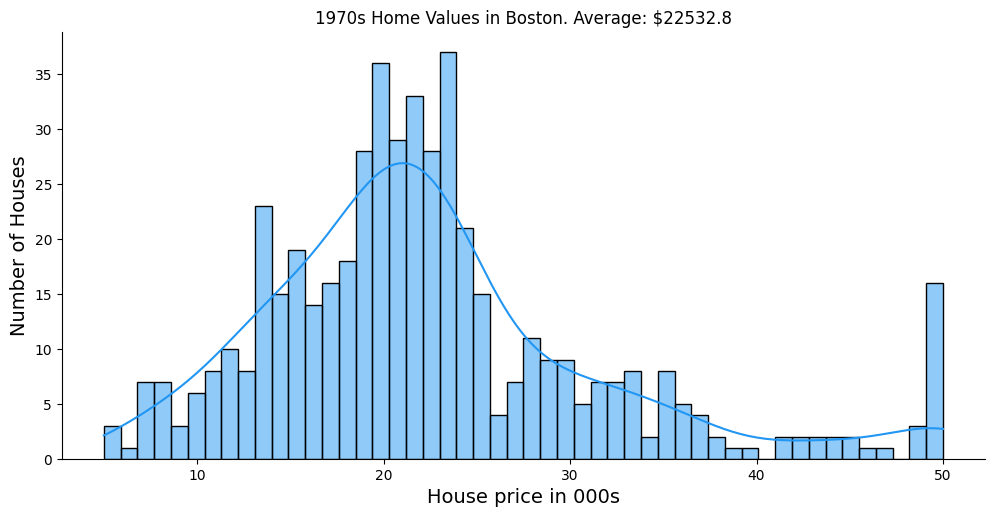

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
sns.displot(data,
            bins=50,
            x='PRICE',
            kde=True,
            aspect=2,
            color='#2196f3')
plt.title(f"1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}")
plt.xlabel('House price in 000s', fontsize=14)
plt.ylabel('Number of Houses', fontsize=14)


plt.show()

We can clearly see most number of houses have price fluctuated around the mean price. However, there's a spike in number of houses at the very right tail at $50,0000 mark.

#### Distance to Employment - Length of Commute 🚗

<Figure size 1600x800 with 0 Axes>

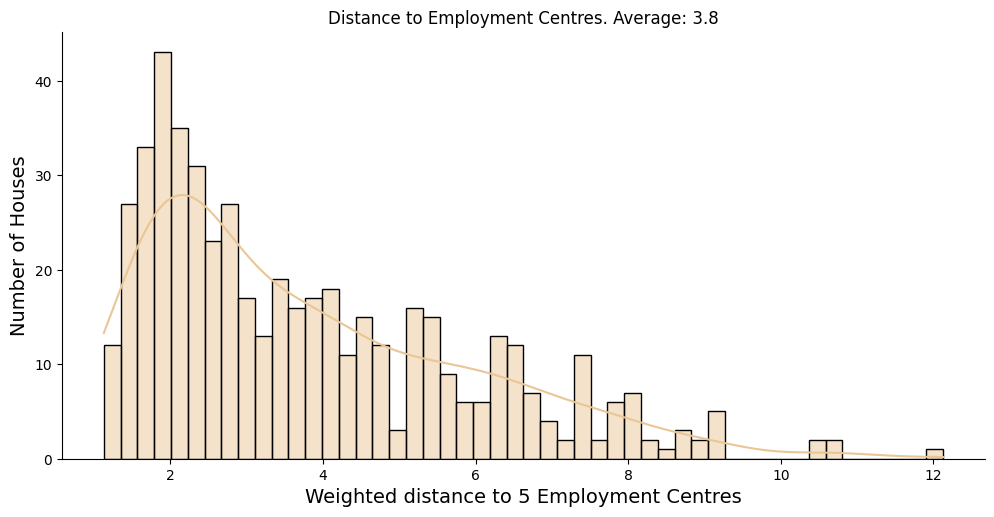

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

sns.displot(data['DIS'],
            bins=50,
            kde=True,
            aspect=2,
            color='#EAC696')
plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted distance to 5 Employment Centres', fontsize=14)
plt.ylabel('Number of Houses', fontsize=14)

plt.show()

Most number of houses are located around 3.8 miles distances to 5 employment centres. There are fewer and fewer houses the further out we go

#### Number of Rooms

<Figure size 1600x800 with 0 Axes>

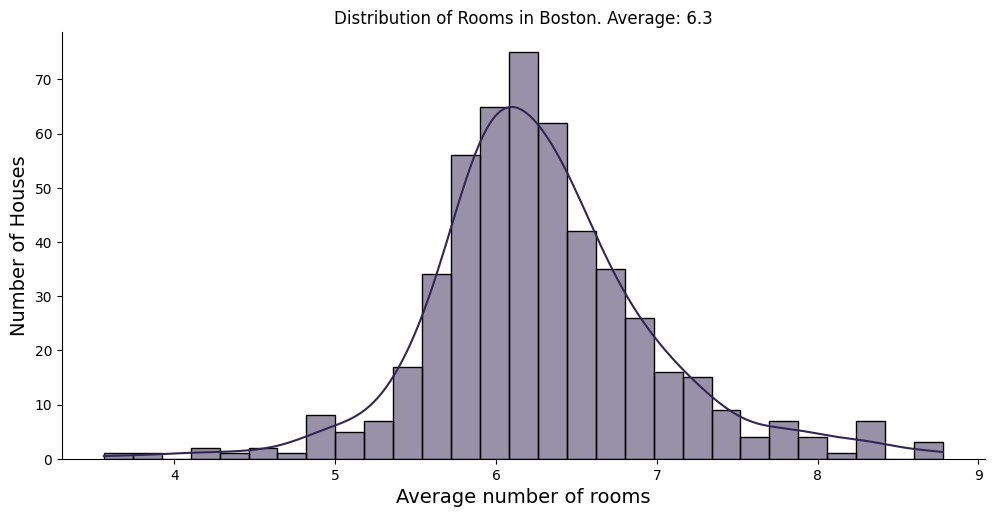

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

sns.displot(data.RM,
            kde=True,
            aspect=2,
            color='#322653')
plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average number of rooms', fontsize=14)
plt.ylabel('Number of Houses', fontsize=14)

plt.show()

Most of houses in Boston in 1970s have average around 5 to 7 rooms. There are very few houses has less than 4 rooms.

#### Access to Highways 🛣

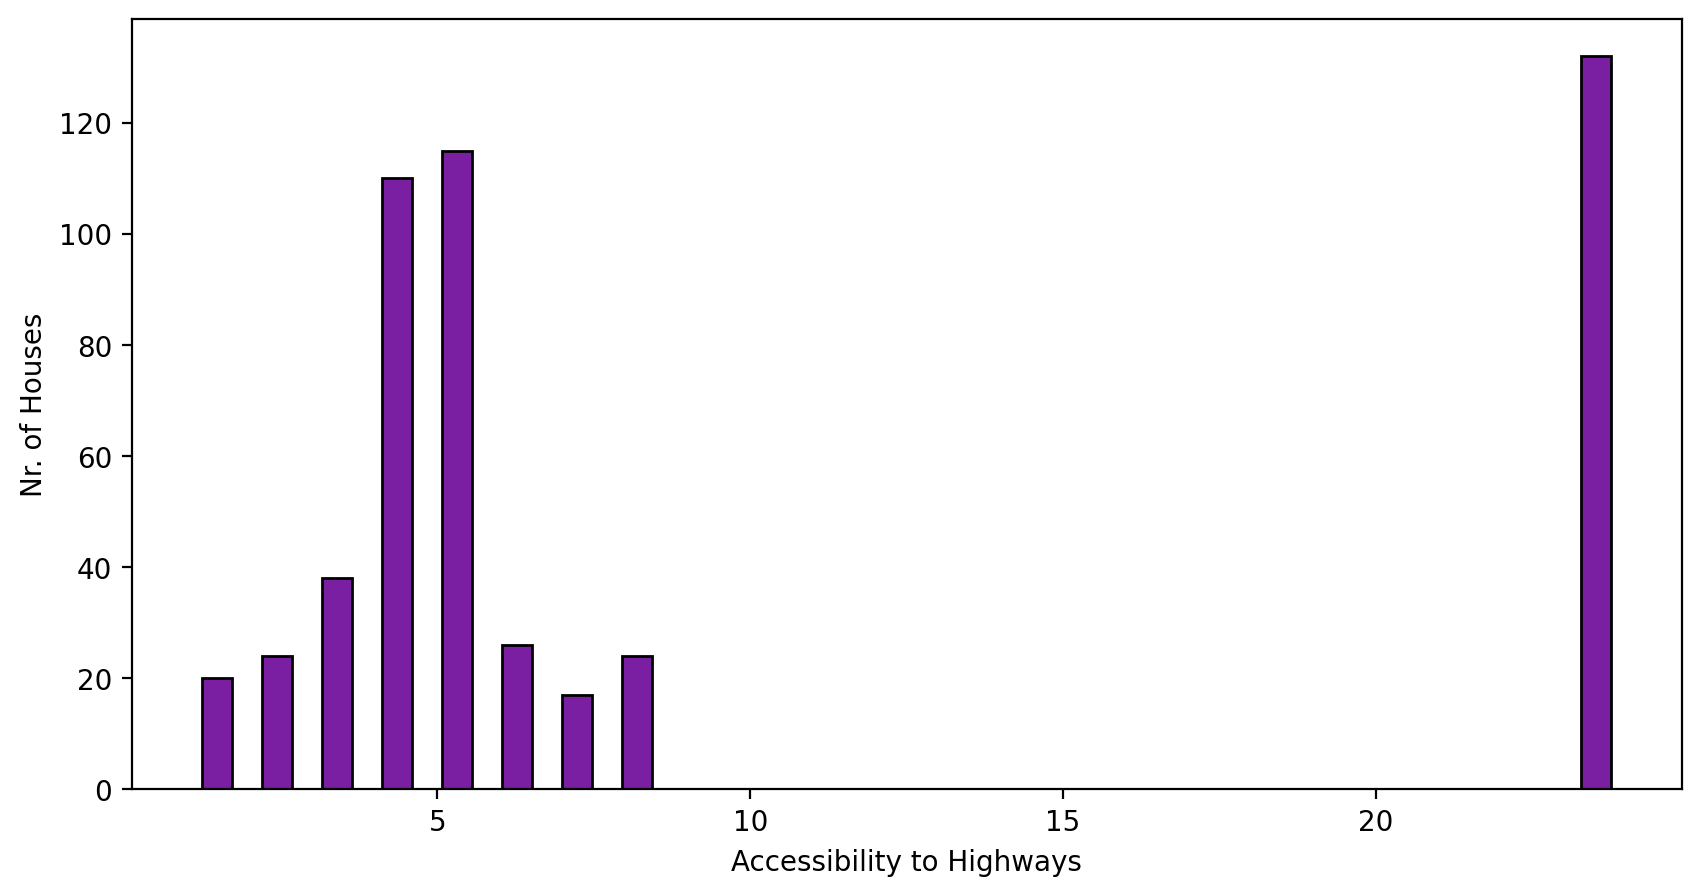

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(data['RAD'],
         bins=24,
         ec='black',
         color='#7b1fa2',
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

RAD is an index of accessibility to roads. Better access to a highway is represented by a higher number. There's a big gap in the values of the index.

#### Next to the River? ⛵️



In [ ]:
river_access = data.CHAS.value_counts()

river_bar = px.bar(x=['No','Yes'],
                   y=river_access.values,
                   color=river_access.values,
                   color_continuous_scale=px.colors.sequential.haline,
                   title="Next to Charles River?")

river_bar.update_layout(xaxis_title='Property Located Next to the River?',
                        yaxis_title='Number of Houses',
                        coloraxis_showscale=False)

river_bar.show()

The bar chart shows that out of 506 houses data, there're only 35 houses located next to Charles River

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot


There might be some relationships in the data for these variables:

* Pollution (NOX) and The Distance to Employment (DIS)?
* The Number of Rooms (RM) and The Home Value (PRICE)?
* The Amount of Poverty in an area (LSTAT) and Home Prices?

I will run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time.

<Figure size 1600x800 with 0 Axes>

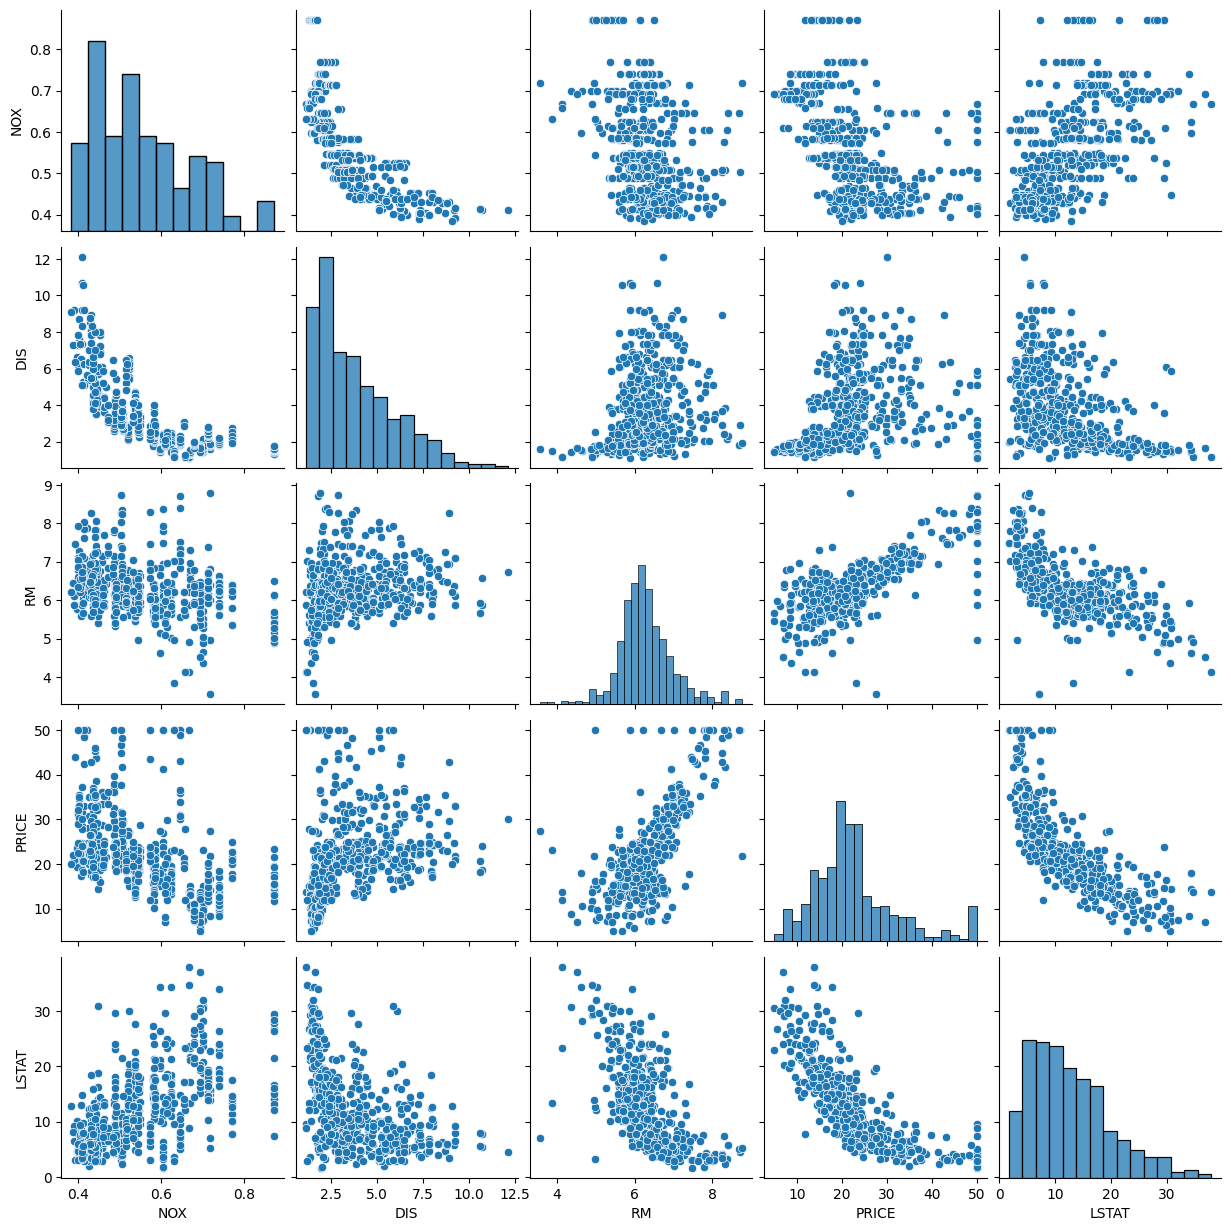

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

sns.pairplot(data,
             x_vars=['NOX','DIS','RM','PRICE','LSTAT'],
             y_vars=['NOX','DIS','RM','PRICE','LSTAT'])

plt.show()

**Run jointplot**

I will use [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships below in more detail:
* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE

(Please refer to Charateristics table above to understand these variables)

#### Distance from Employment vs. Pollution

Compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution)

<Figure size 1600x800 with 0 Axes>

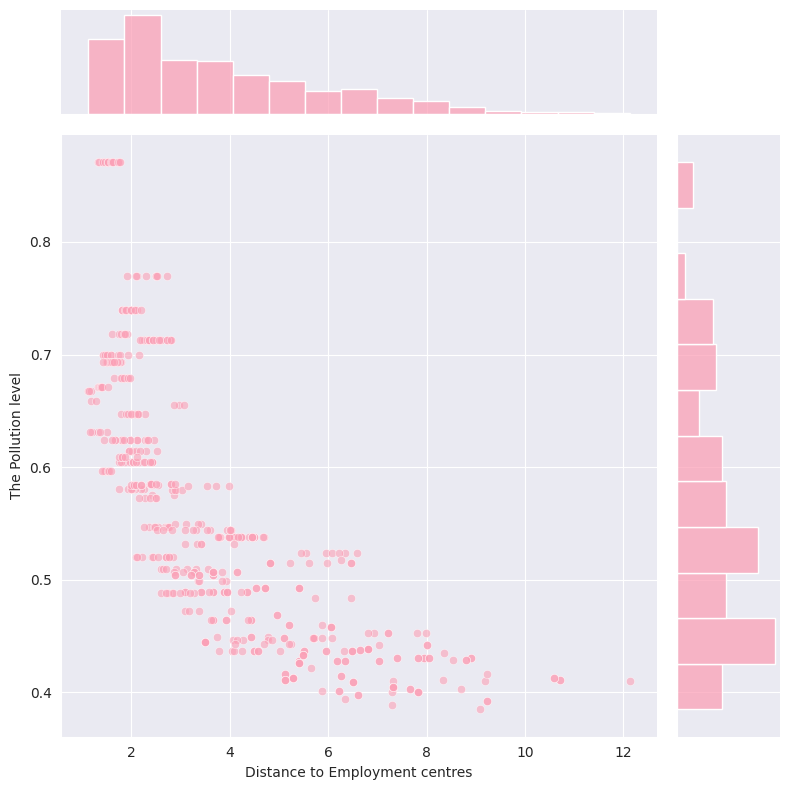

In [ ]:
plt.figure(figsize=(8,4),dpi=200)

with sns.axes_style('darkgrid'):
  sns.jointplot(data,
                   x='DIS',
                   y='NOX',
                   height=8,
                   color='#FBA1B7',
                   kind='scatter',
                   joint_kws={'alpha':0.6})

plt.xlabel('Distance to Employment centres')
plt.ylabel('The Pollution level')

plt.show()

The graph desmontrate some kind of relationship between the distance and the pollution. As the farther out of employment centre, the pollution tends to go down.
However, even at the same distance of 2 miles to employment centres, we can get very different levels of pollution. By the same token, distance of 9 miles and 12 miles have very similar levels of pollution.

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution

Compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution).

<Figure size 1600x800 with 0 Axes>

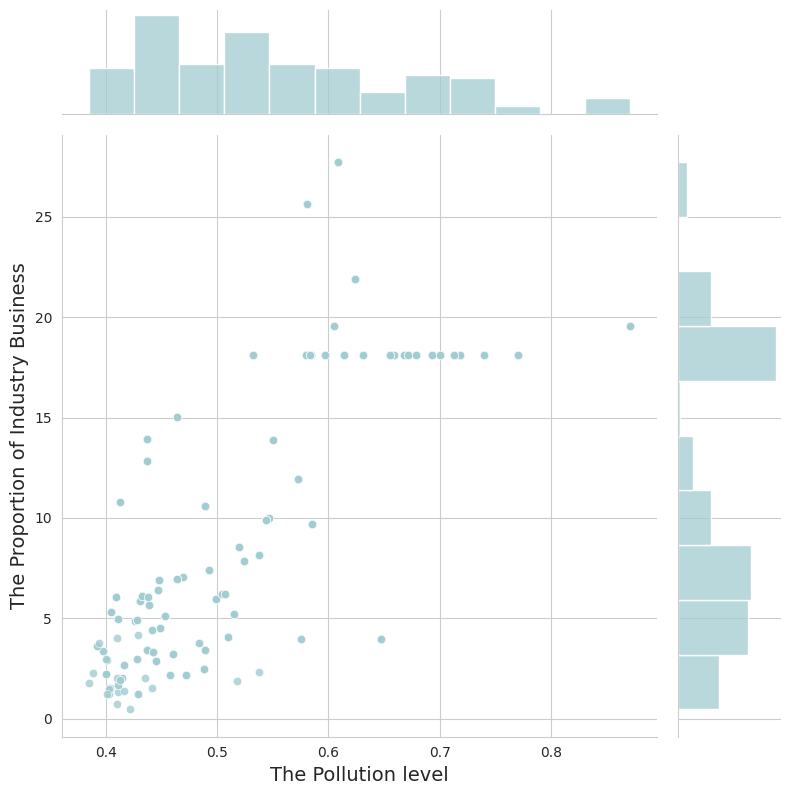

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
  sns.jointplot(data,
                x='NOX',
                y='INDUS',
                kind='scatter',
                height=8,
                color='#A1CCD1',
                joint_kws={'alpha':0.8})

plt.xlabel('The Pollution level', fontsize=14)
plt.ylabel('The Proportion of Industry Business', fontsize=14)
plt.show()

There's somewhat a relationship between proportion of industry and the pollution. The lower proportion of industry, the lower pollution. However, there are different levels of pollution at around 18% propotion of industry or same pollution levels despite of the difference between the propotion of industry after passing 18%


#### % of Lower Income Population vs Average Number of Rooms

Compare LSTAT (proportion of lower-income population) with RM (number of rooms).

<Figure size 1600x800 with 0 Axes>

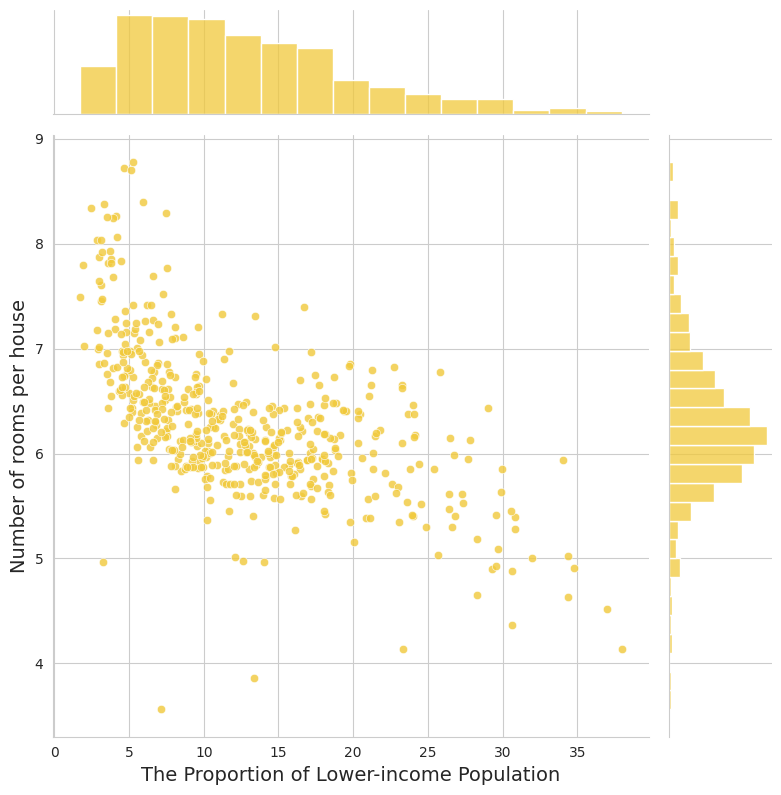

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
  sns.jointplot(data,
                x='LSTAT',
                y='RM',
                height=8,
                color='#F1C93B',
                joint_kws={'alpha':0.8})
plt.xlabel('The Proportion of Lower-income Population', fontsize=14)
plt.ylabel('Number of rooms per house', fontsize=14)

plt.show()

Most of houses having more than 7 rooms are located in areas have below 5% poverty rate.


#### % of Lower Income Population versus Home Price


Compare LSTAT (proportion of lower-income population) with PRICE.

<Figure size 1600x800 with 0 Axes>

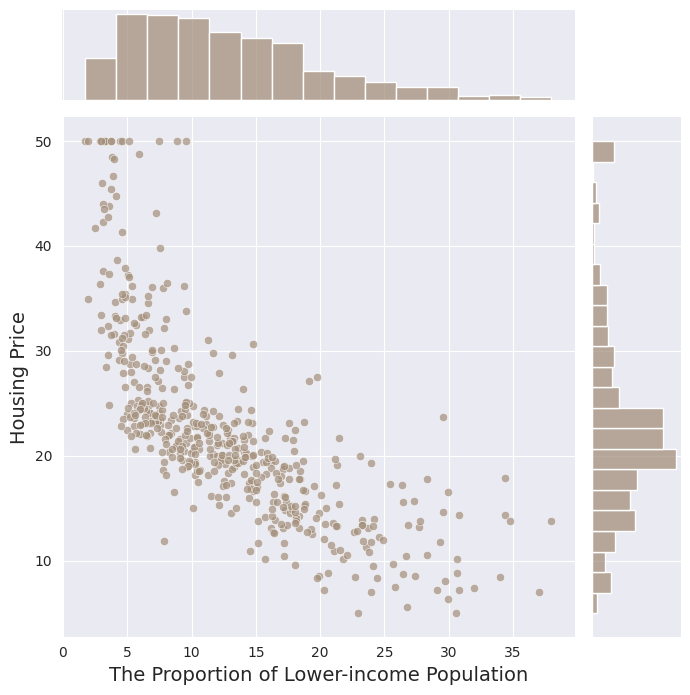

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  sns.jointplot(data,
                x='LSTAT',
                y='PRICE',
                kind='scatter',
                height=7,
                color='#A4907C',
                joint_kws={'alpha':0.7})
plt.xlabel('The Proportion of Lower-income Population', fontsize=14)
plt.ylabel('Housing Price', fontsize=14)
plt.show()

From the graph, the housing price is higher in the areas have lower poverty rate.

Most of houses have price from $20,000 and above are located in below 15% poverty rate area.

We also see there a cap $50,000 at housing price. That raises us a question if there are any maximum values imposed during data collection.


#### Number of Rooms versus Home Value

Compare RM (number of rooms) with PRICE.

<Figure size 1600x800 with 0 Axes>

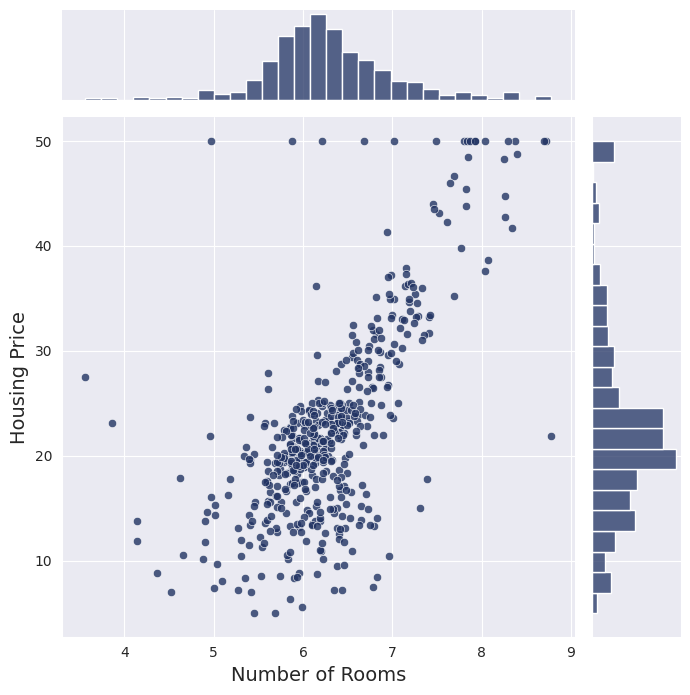

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  sns.jointplot(data,
                x='RM',
                y='PRICE',
                kind='scatter',
                color='#213363',
                height=7,
                joint_kws={'alpha':0.8})
plt.xlabel('Number of Rooms', fontsize=14)
plt.ylabel('Housing Price', fontsize=14)
plt.show()

Again, we see those homes at the $50,000 mark all lined up at the top of the chart.

Most of houses having less than 7 rooms are worth below $25,000

# Split Training & Test Dataset

I *can't* use all 506 entries in our dataset to train our model. The reason is that I want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way I can get a better idea of its performance in the real world.

**Jobs need to be done**

* Import the [`train_test_split()` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn
* Create 4 subsets: X_train, X_test, y_train, y_test
* Split the training and testing data roughly 80/20.
* To get the same random split every time I run my notebook use `random_state=10`. This helps me get the same results every time and avoid confusion.



In [ ]:
target = data['PRICE']

features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,target,
                                                    test_size=0.2,
                                                    random_state=10)

In [ ]:
# % of trainning set
train_pct = len(X_train)/len(features) * 100
print(f"Training data is {train_pct:.3}% of the total data.")

# % of test data set
test_pct = len(X_test)/len(features)*100
print(f"Test data makes up the remaining {test_pct:.3}%")

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%


# Multivariable Regression

Home price is affected by 13 features in this dataset. Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run my First Regression

Use sklearn to run the regression on the training dataset. From there I will see how high is the R-squared

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
rsquared= regression.score(X_train,y_train)
print(f"Training data r-squared: {rsquared:.3}")

Training data r-squared: 0.75


0.75 is a very decent R-squared! This can be understood that 13 features in dataset can explain 75% of the home prices.

### Evaluate the Coefficients of the Model

Here I do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

* We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?
* What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?
* Check the other coefficients. Do they have the expected sign?
* Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium people would have to pay for an extra room?

In [ ]:
regression_coef = pd.DataFrame(regression.coef_, index=X_train.columns, columns=['Coefficient'])
regression_coef

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


From the coefficients table, they are totally matched with what we see in Scatter Plot above about the relationship between PRICE to other features.

The sign in coefficients totally makes sense in the way of each features affect to the housing price.


In [ ]:
#Price for having an extra room
extra_price = regression_coef.loc['RM'].values[0] * 1000
print(f"For any extra room, the price will increase: ${extra_price:.6}")

For any extra room, the price will increase: $3108.46


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`.

Then I will create 2 scatter plots:
* One to see Actual Values (y_train) against the Predicted Values
* One to see Residuals against the Predicted Values



In [ ]:
#check the residuals
predicted_value = regression.predict(X_train)
residuals = (y_train - predicted_value)

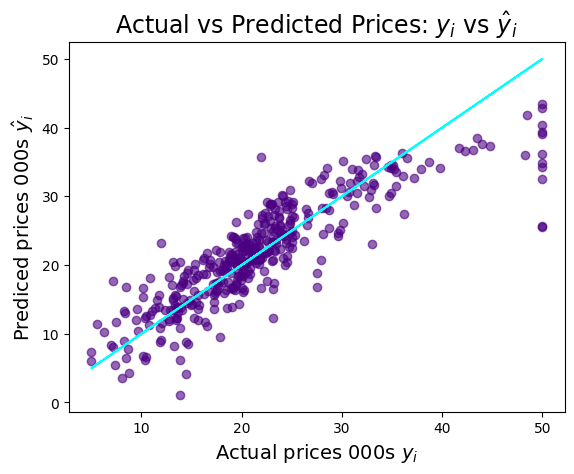

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_value, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

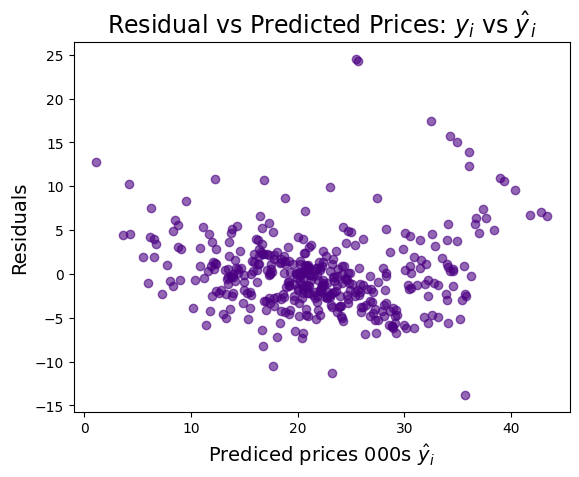

In [ ]:
# Residual vs Predicted Price
plt.figure(dpi=100)
plt.scatter(x=predicted_value, y=residuals, c='indigo', alpha=0.6)
plt.title(f'Residual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

I check the Residuals to ensure that they look random. The Residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

Next step, I analyse the distribution of the residuals. In particular, I am interested in the **skew** and the **mean**.

In an ideal case, what I want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like:

<img src=https://i.imgur.com/7QBqDtO.png height=400>


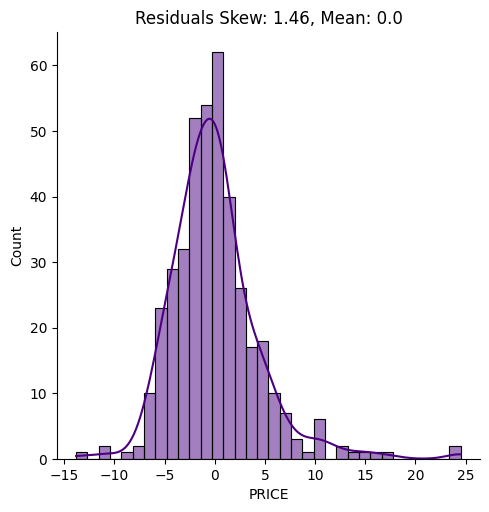

In [ ]:
#Residual distribution chart
resid_mean = round(residuals.mean(),2)
resid_skew = round(residuals.skew(),2)

#create histogram
sns.displot(residuals,kde=True,color='indigo')
plt.title(f'Residuals Skew: {resid_skew}, Mean: {resid_mean}')
plt.show()

I can see that the residuals have a skewness of 1.46. So there might be some room for improvement here.

### Data Transformations for a Better Fit

If I do data transformation, model might be better fit. But first, let inverstigate if the target `data['PRICE']`could be a suitable candidate for a log transformation:

* Use Seaborn's `.displot()` to show a histogram and KDE of the price data.
* Calculate the skew of that distribution.
* Use [NumPy's `log()` function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to create a Series that has the log prices
* Plot the log prices using Seaborn's `.displot()` and calculate the skew.



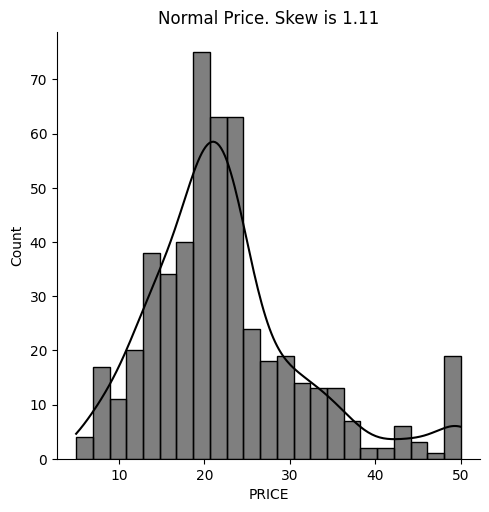

In [ ]:
tgt_skew = data.PRICE.skew()
sns.displot(data['PRICE'], kde=True, color='black')
plt.title(f'Normal Price. Skew is {tgt_skew:.3}')
plt.show()

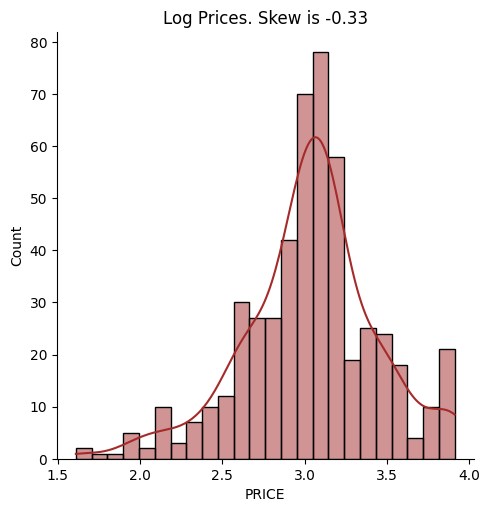

In [ ]:
y_log=np.log(data.PRICE)
sns.displot(y_log,kde=True,color='brown')
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

The log prices have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log prices will improve our regression's r-squared and our model's residuals.

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$


* Use `train_test_split()` with the same random state as before to make the results comparable.
* Run a second regression, but this time use the transformed target data.



In [ ]:
new_target = np.log(data.PRICE)
features = data.drop('PRICE', axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(features,new_target,
                                                    test_size=0.2,
                                                    random_state=10)
regr = LinearRegression()
regr.fit(X2_train,y2_train)

r_squared=regr.score(X2_train, y2_train)
log_predicted_values = regr.predict(X2_train)
log_residuals = (y2_train - log_predicted_values)



In [ ]:
print(f"R-squared of the regression on the training data: {r_squared:.3}")

R-squared of the regression on the training data: 0.793


This time we got an r-squared of 0.79 compared to 0.75. This looks like a some improvement potential

## Evaluating Coefficients with Log Prices

We need to check the coefficients of the new regression model. Do the coefficients still have the expected sign?


In [ ]:
log_reg_coef = pd.DataFrame(regr.coef_, index=X2_train.columns, columns=['Coefficients'])
log_reg_coef

,Coefficients
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


From the Coefficients table above, the signs are still make sense for each features.

Being close to the river results in higher property prices because CHAS has a coefficient greater than zero. Therefore property prices are higher next to the river.

More students per teacher - a higher PTRATIO - is a clear negative. Smaller classroom sizes are indicative of higher quality education, so have a negative coefficient for PTRATIO.

## Regression with Log Prices & Residual Plots
  

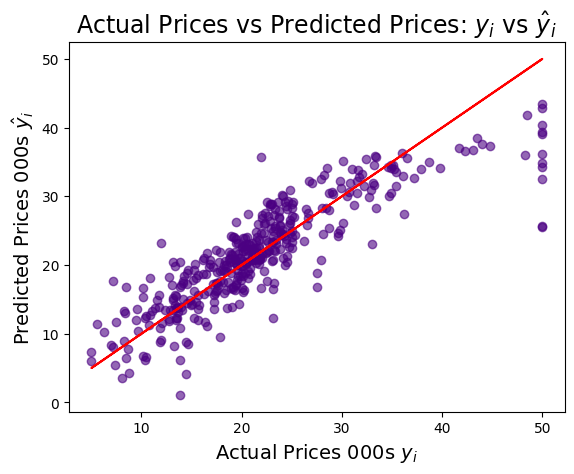

In [ ]:
# Original Regression of Actual Price vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_value, c='indigo', alpha=0.6)
plt.plot(y_train,y_train,color='red')
plt.title(f'Actual Prices vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted Prices 000s $\hat y _i$', fontsize=14)
plt.show()

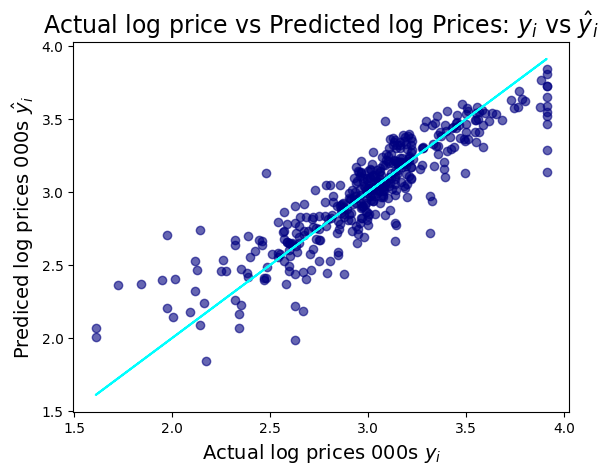

In [ ]:
# Original Regression of Actual Log Price vs. Predicted Log Prices
plt.figure(dpi=100)
plt.scatter(x=y2_train, y=log_predicted_values, c='navy', alpha=0.6)
plt.plot(y2_train, y2_train, color='cyan')
plt.title(f'Actual log price vs Predicted log Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual log prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced log prices 000s $\hat y _i$', fontsize=14)
plt.show()

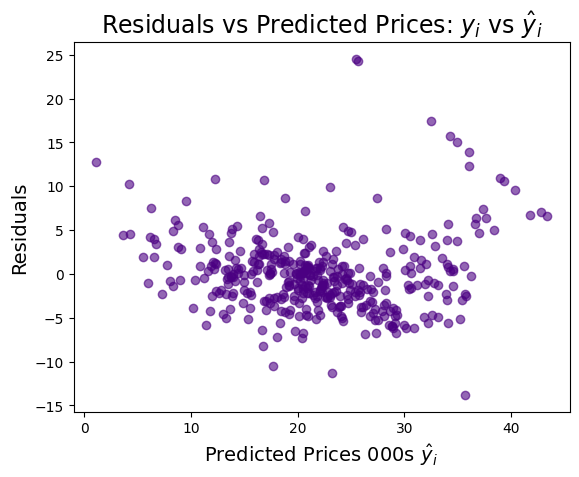

In [ ]:
#Residual vs Predicted Price
plt.figure(dpi=100)
plt.scatter(x=predicted_value, y=residuals, c='indigo', alpha=0.6)
plt.title(f'Residuals vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Predicted Prices 000s $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

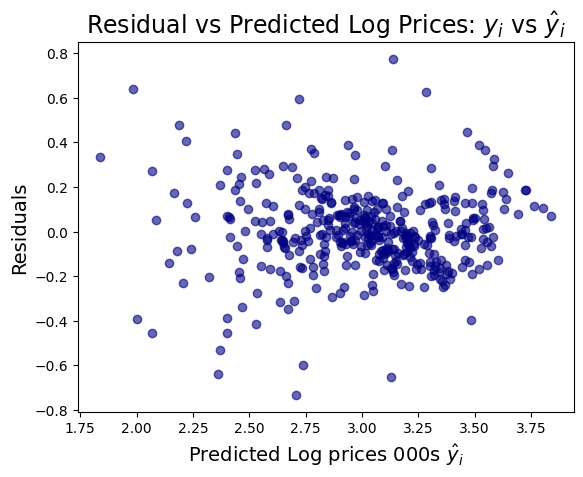

In [ ]:
# Residual vs Predicted Price
plt.figure(dpi=100)
plt.scatter(x=log_predicted_values, y=log_residuals, c='navy', alpha=0.6)
plt.title(f'Residual vs Predicted Log Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Predicted Log prices 000s $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

It's hard to see a difference between old and new model from charts above.


**Calculate the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?**

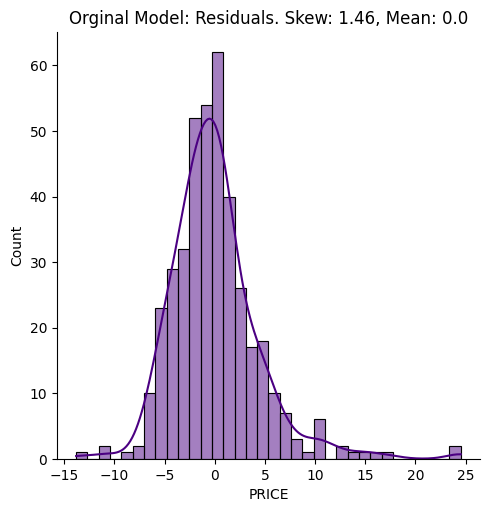

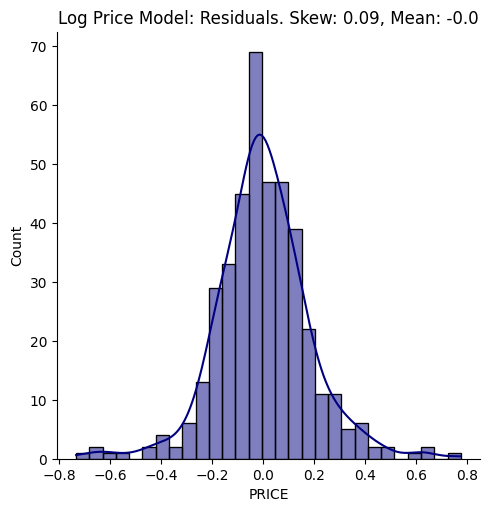

In [ ]:
#Residual log price distribution chart
log_resid_mean = round(log_residuals.mean(),2)
log_resid_skew = round(log_residuals.skew(),2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Orginal Model: Residuals. Skew: {resid_skew}, Mean: {resid_mean}')
plt.show

sns.displot(log_residuals,kde=True,color='navy')
plt.title(f'Log Price Model: Residuals. Skew: {log_resid_skew}, Mean: {log_resid_mean}')
plt.show()

Our new regression residuals have a skew of 0.09 compared to a skew of 1.46. The mean is still around 0. From both a residuals perspective and an r-squared perspective we have improved our model with the data transformation.

# Compare Out of Sample Performance

The *real* test is how this model performs on data that it has not "seen" yet. This is where I use `X_test`

I will compare the r-squared of the two models on the test dataset.
* Which model does better?
* Is the r-squared higher or lower than for the training dataset? Why?

In [ ]:
#original test model
print(f'Original Model Test Data r-squared: {regression.score(X_test, y_test):.2}')


Original Model Test Data r-squared: 0.67


In [ ]:
#Log Price test model
print(f'Log Model Test Data r-squared: {regr.score(X2_test, y2_test):.2}')

Log Model Test Data r-squared: 0.74


By definition, the model has not been optimised for the testing data. Therefore performance will be worse than on the training data. However, our r-squared still remains high, so we have built a useful model.

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [ ]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


**Predict how much the average property is worth using the stats above.**

In [ ]:
#Prediction
log_estimate = regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

#Convert Log Price to actual dollar estimate
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The property is estimated to be worth $20703.2


A property with an average value for all the features has a value of $20,700.

If property has some charateristics as below, we can estimate the property's price base on the model I built above

In [ ]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [ ]:
# Set Property Characteristics

property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town
property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

if next_to_river:
  property_stats['CHAS'] = 1
else:
  property_stats['CHAS'] = 0



In [ ]:
# Make prediction
new_log_estimate = regr.predict(property_stats)[0]
print(f'The log price estimate is: {new_log_estimate:.3}')

# Convert Log Price to Actual Dollar estimate
new_dollar_est = np.exp(new_log_estimate)*1000
print(f'The property is estimated to be worth ${new_dollar_est:.6}')

The log price estimate is: 3.25
The property is estimated to be worth $25792.0
